<a href="https://colab.research.google.com/github/GarvinAgweli/personal/blob/main/SME_FINANCIAL_DECISION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split,StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import  precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import xgboost as xgb
import statsmodels.api as sm
import pickle
import gc
from sklearn import svm

In [2]:
df=pd.read_csv('sme_financial_decision.csv')
df.head()

,FQ1,Established_year,Type_SME,Sector,SME_Size,FL1,FL2,FL3,FL4,FR1,...,MDA3,MDA4,FDM1,FDM2,FDM3,FDM4,FA1,FA2,FA3,FA4
0,YES,3,3,1,1,3,3,3,5,2,...,5,4,3,5,5,5,3,3,3,5
1,YES,2,2,2,3,2,2,3,5,2,...,4,5,2,1,3,3,2,2,3,5
2,YES,3,2,1,3,3,3,5,5,2,...,5,4,3,3,3,3,3,3,5,5
3,YES,1,2,2,2,4,4,5,5,2,...,5,3,4,4,5,5,4,4,5,5
4,YES,2,2,3,4,3,3,3,5,4,...,4,4,3,3,3,3,3,3,3,5


In [3]:
df.shape

(450, 29)

In [4]:
df.describe()

,Established_year,Type_SME,Sector,SME_Size,FL1,FL2,FL3,FL4,FR1,FR2,...,MDA3,MDA4,FDM1,FDM2,FDM3,FDM4,FA1,FA2,FA3,FA4
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,1.880000,2.557778,2.971111,2.764444,3.160000,3.188889,4.115556,3.442222,2.866667,2.133333,...,4.360000,3.433333,3.120000,3.326667,3.364444,3.337778,3.164444,3.213333,4.111111,3.517778
std,0.686361,0.988799,1.150796,1.083415,0.743914,0.782527,0.814664,0.959071,0.892932,1.120770,...,0.849053,0.767520,0.724254,0.638379,0.684267,0.729062,0.736922,0.794637,0.807046,1.005949
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,...,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,5.000000,4.000000,4.000000,3.000000,...,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.columns

Index(['FQ1', 'Established_year', 'Type_SME', 'Sector', 'SME_Size', 'FL1',
       'FL2', 'FL3', 'FL4', 'FR1', 'FR2', 'FR3', 'FR4', 'RA1', 'RA2', 'RA3',
       'RA4', 'MDA1', 'MDA2', 'MDA3', 'MDA4', 'FDM1', 'FDM2', 'FDM3', 'FDM4',
       'FA1', 'FA2', 'FA3', 'FA4'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FQ1               450 non-null    object
 1   Established_year  450 non-null    int64 
 2   Type_SME          450 non-null    int64 
 3   Sector            450 non-null    int64 
 4   SME_Size          450 non-null    int64 
 5   FL1               450 non-null    int64 
 6   FL2               450 non-null    int64 
 7   FL3               450 non-null    int64 
 8   FL4               450 non-null    int64 
 9   FR1               450 non-null    int64 
 10  FR2               450 non-null    int64 
 11  FR3               450 non-null    int64 
 12  FR4               450 non-null    int64 
 13  RA1               450 non-null    int64 
 14  RA2               450 non-null    int64 
 15  RA3               450 non-null    int64 
 16  RA4               450 non-null    int64 
 17  MDA1            

In [7]:
df.dtypes

,0
FQ1,object
Established_year,int64
Type_SME,int64
Sector,int64
SME_Size,int64
FL1,int64
FL2,int64
FL3,int64
FL4,int64
FR1,int64


In [8]:
numeric_features=df.select_dtypes(include=[np.number])

corr=numeric_features.corr()

print("Correlation Matrix \n")
display(corr)

Correlation Matrix 



,Established_year,Type_SME,Sector,SME_Size,FL1,FL2,FL3,FL4,FR1,FR2,...,MDA3,MDA4,FDM1,FDM2,FDM3,FDM4,FA1,FA2,FA3,FA4
Established_year,1.000000,0.043055,-0.024137,-0.017132,0.015877,0.021563,-0.066757,0.016511,0.050149,0.041112,...,-0.009784,0.001691,0.046954,0.008336,-0.006260,0.014421,-0.035755,-0.042795,0.012062,0.057934
Type_SME,0.043055,1.000000,-0.019081,-0.035084,-0.006540,0.018965,-0.033190,-0.018783,-0.026570,-0.037112,...,0.041490,0.094593,-0.031473,-0.010561,-0.024607,-0.039490,0.020553,0.029630,0.017056,0.042627
Sector,-0.024137,-0.019081,1.000000,0.042761,0.031427,0.018439,-0.001183,0.017655,-0.005924,-0.048811,...,0.049417,0.059592,0.014857,0.009843,-0.009227,-0.038780,-0.062668,-0.078488,-0.018119,-0.117874
SME_Size,-0.017132,-0.035084,0.042761,1.000000,0.010943,0.026328,0.068759,0.036171,-0.073977,-0.093299,...,0.077865,0.106956,0.016235,0.014899,0.049964,-0.034387,0.006782,0.006761,-0.092265,-0.037020
FL1,0.015877,-0.006540,0.031427,0.010943,1.000000,0.961827,0.090698,0.671648,0.032187,-0.383592,...,0.613826,0.338580,0.890237,0.747926,0.707745,0.179370,0.061590,0.066460,0.081612,0.043809
FL2,0.021563,0.018965,0.018439,0.026328,0.961827,1.000000,0.070494,0.698603,0.026562,-0.361447,...,0.584610,0.382564,0.859827,0.714379,0.673913,0.165088,0.065743,0.067574,0.097177,0.050896
FL3,-0.066757,-0.033190,-0.001183,0.068759,0.090698,0.070494,1.000000,-0.025642,-0.814605,-0.775523,...,0.493544,0.283055,0.168956,-0.047050,-0.023776,-0.009616,-0.039143,-0.007202,-0.006022,0.016511
FL4,0.016511,-0.018783,0.017655,0.036171,0.671648,0.698603,-0.025642,1.000000,-0.037623,-0.284967,...,0.318253,0.374470,0.599974,0.440135,0.449587,0.069381,0.038683,0.030821,0.080248,0.064550
FR1,0.050149,-0.026570,-0.005924,-0.073977,0.032187,0.026562,-0.814605,-0.037623,1.000000,0.756655,...,-0.462387,-0.354219,-0.037194,0.103929,0.046900,0.065914,0.019857,-0.016322,0.014423,-0.071739
FR2,0.041112,-0.037112,-0.048811,-0.093299,-0.383592,-0.361447,-0.775523,-0.284967,0.756655,1.000000,...,-0.776099,-0.569600,-0.436807,-0.082802,-0.115777,0.026530,-0.037393,-0.067020,0.018057,-0.069272


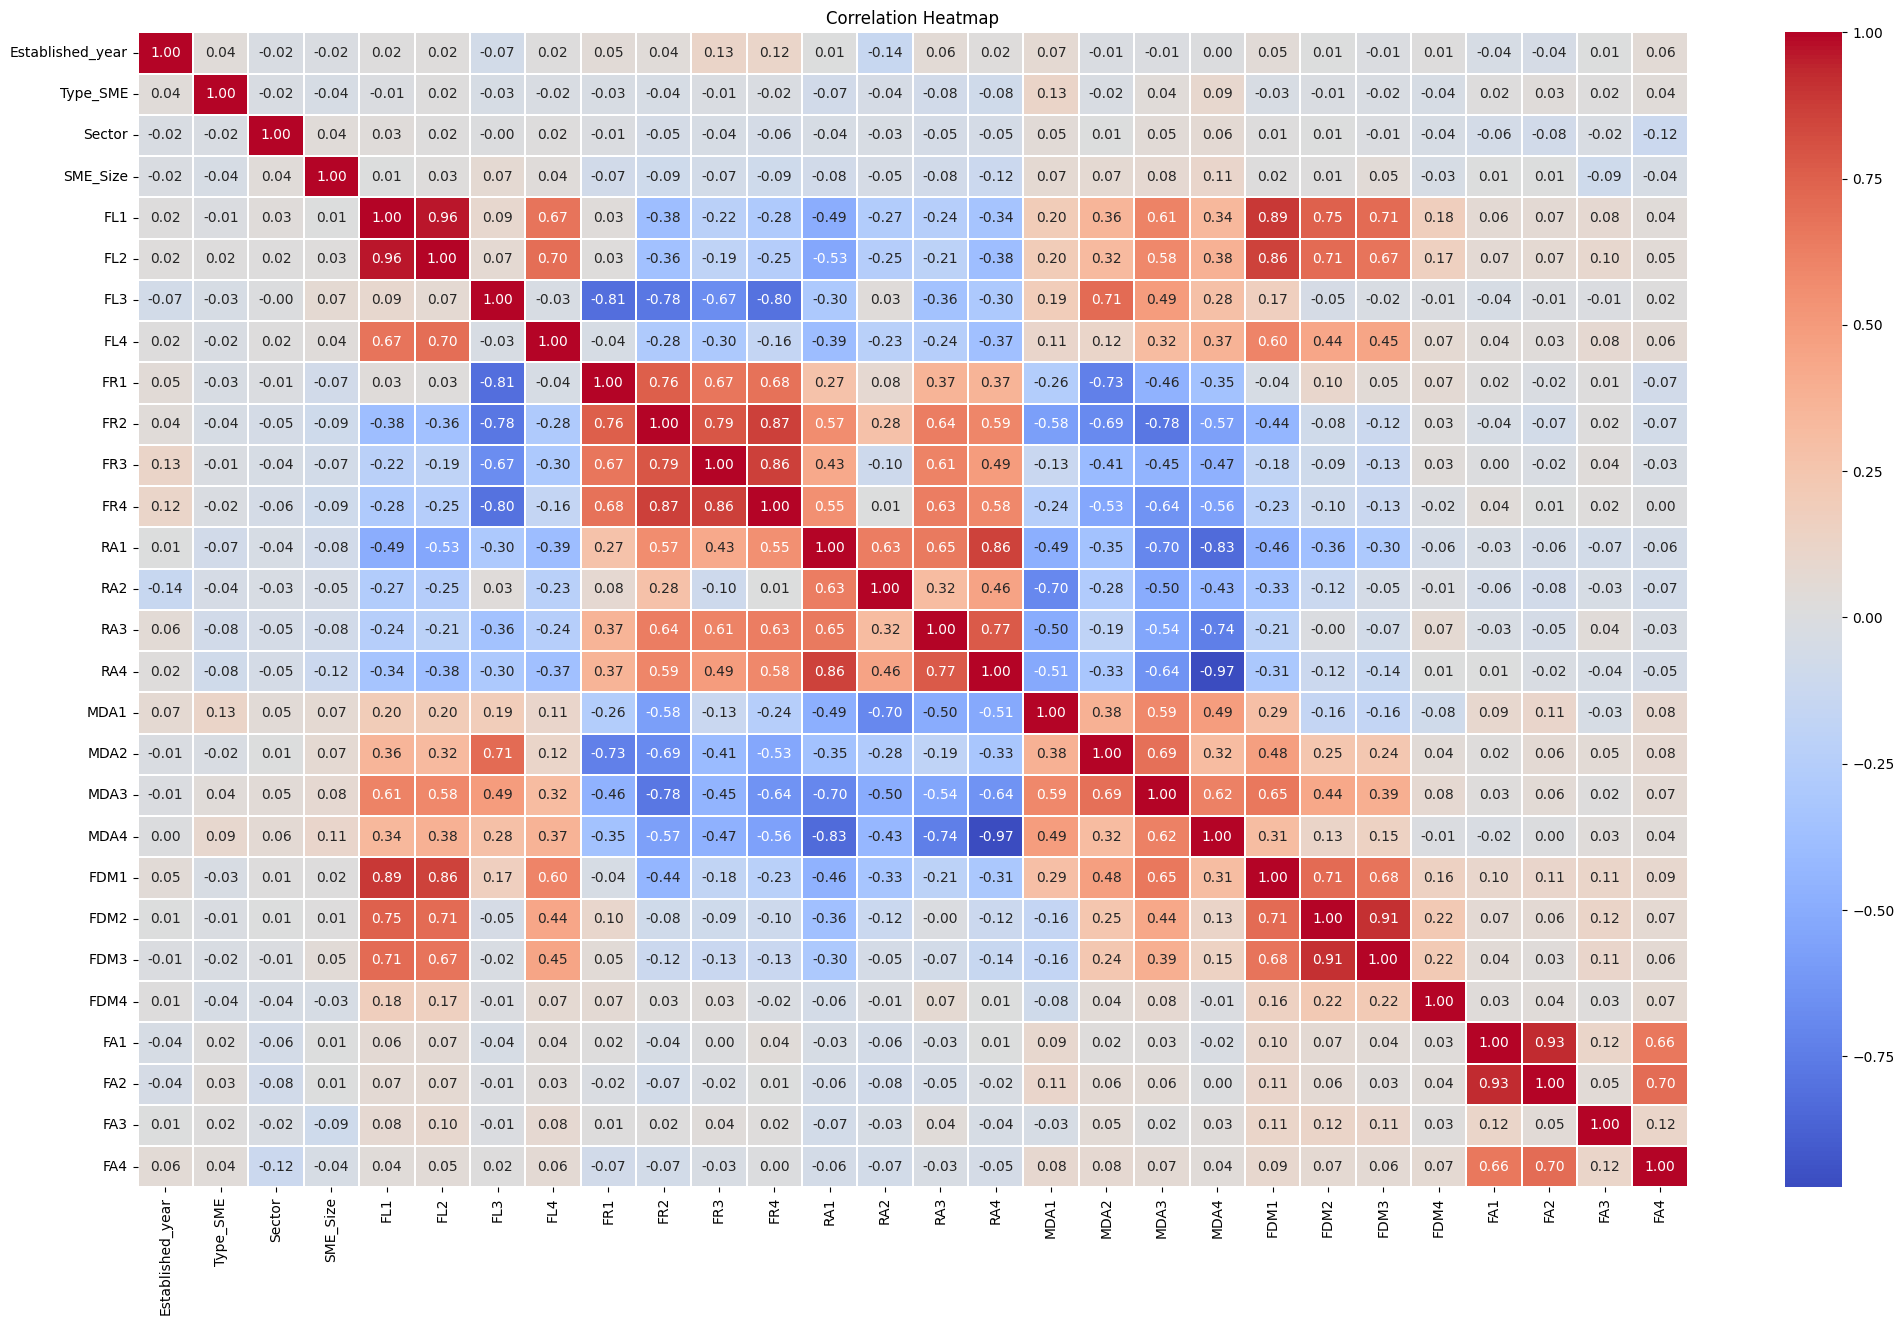

In [9]:
#Plotting correlation analysis
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
#DATA VISUALISATION
#Count each SME type
SME_type_count=df["Type_SME"].value_counts()
print(SME_type_count)

Type_SME
2    150
3    136
4     93
1     71
Name: count, dtype: int64


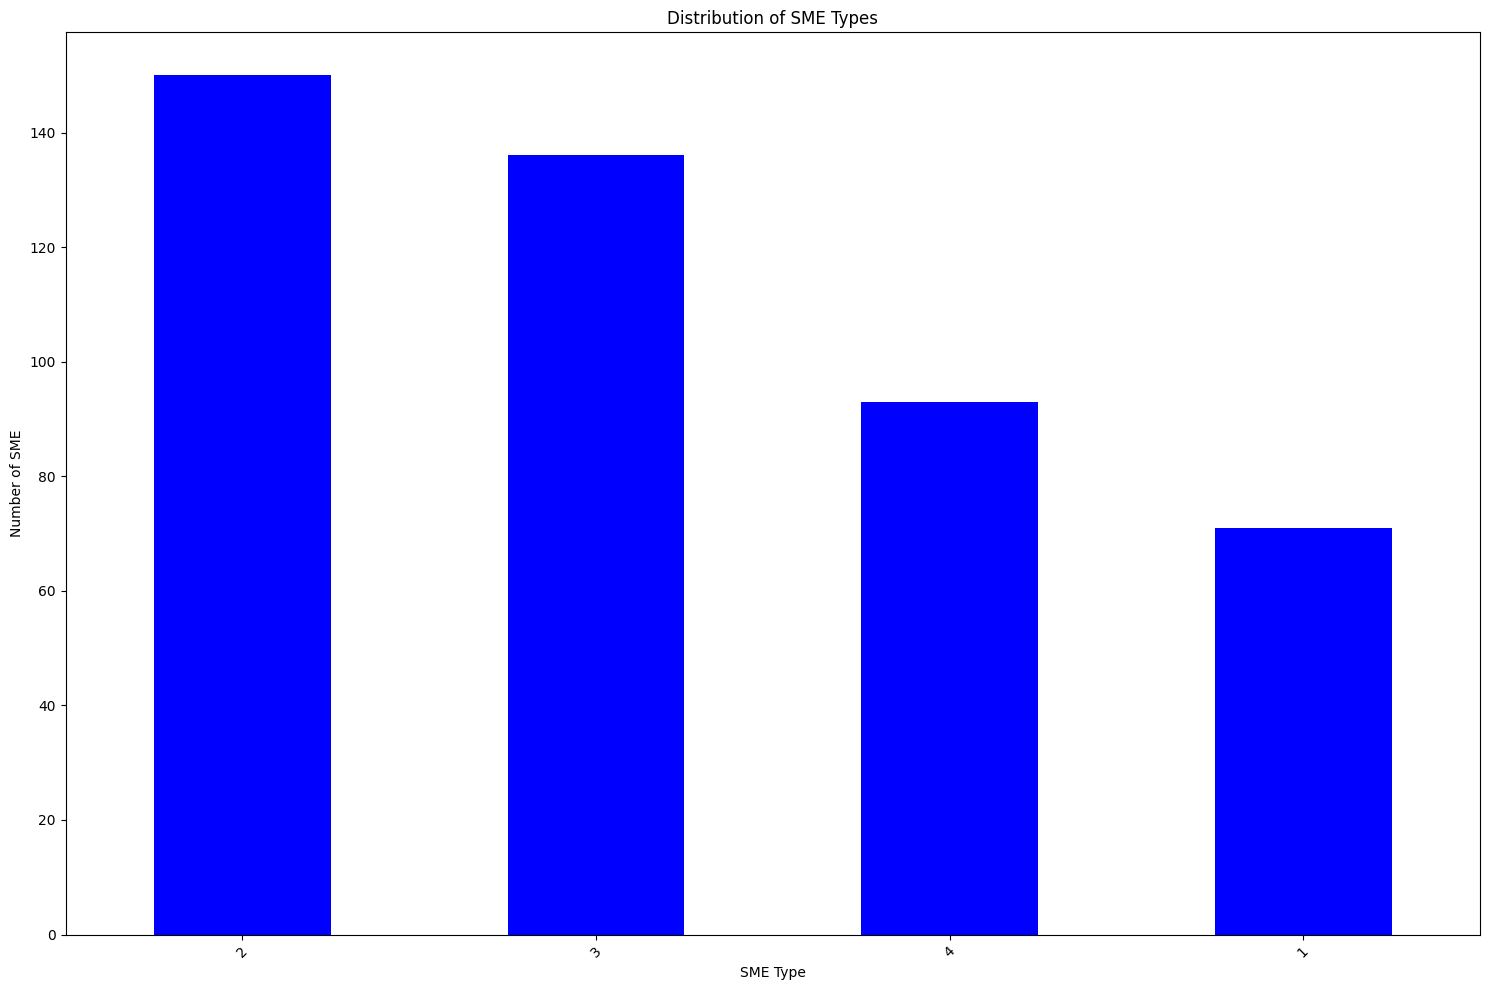

In [11]:
plt.figure(figsize=(15,10))
SME_type_count.plot(kind='bar',color='blue')
plt.title('Distribution of SME Types')
plt.xlabel('SME Type')
plt.ylabel('Number of SME')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

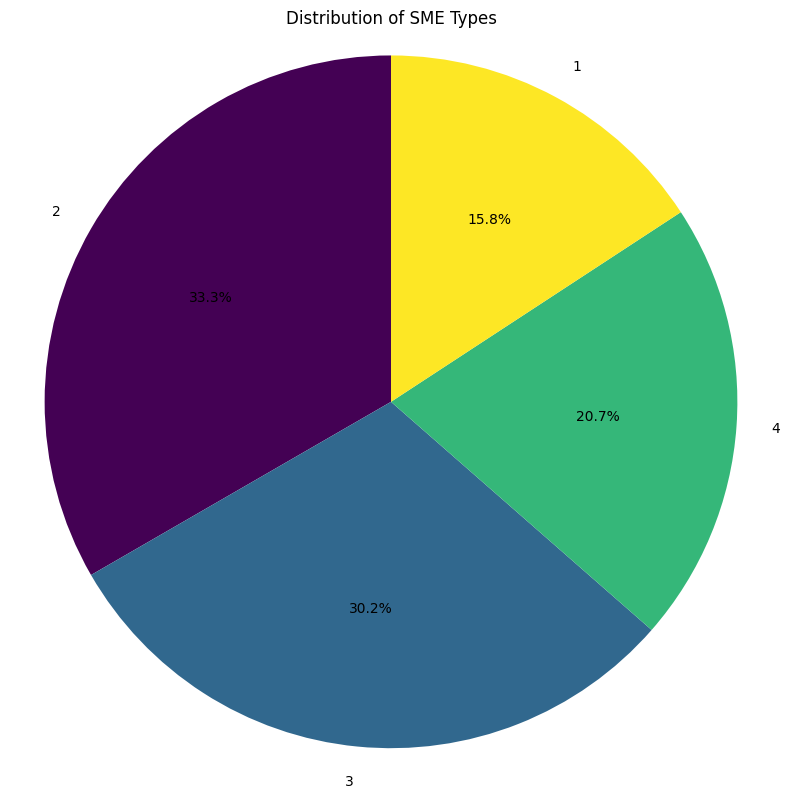

In [12]:
plt.figure(figsize=(8,8))
SME_type_count.plot(kind='pie',autopct='%1.1f%%',startangle=90,cmap='viridis')
plt.title('Distribution of SME Types')
plt.ylabel("")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [20]:
#PREDICTIVE MODELLING
#Splitting data
X=df.drop(['Type_SME', 'FQ1'], axis=1)
y=df['Type_SME']

In [47]:
#Train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

# Subtract 1 from y_train and y_test to make them zero-indexed for XGBoost
y_train = y_train - 1
y_test = y_test - 1

In [24]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
#Logistic Regression Model
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [26]:
#Make Prediction on test data
y_pred=logreg.predict(X_test_scaled)
y_pred_proba=logreg.predict_proba(X_test_scaled)

In [31]:
#Evaluation of metrics
print('Classification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_pred))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_pred))
print('ROC AUC :ovr ', roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

Classification report:
               precision    recall  f1-score   support

           1       1.00      0.07      0.13        14
           2       0.40      0.70      0.51        30
           3       0.62      0.37      0.47        27
           4       0.29      0.32      0.30        19

    accuracy                           0.42        90
   macro avg       0.58      0.36      0.35        90
weighted avg       0.54      0.42      0.39        90

Confusion matrix:
 [[ 1  5  4  4]
 [ 0 21  1  8]
 [ 0 14 10  3]
 [ 0 12  1  6]]
Logistic Regression Accuracy:  0.4222222222222222
ROC AUC :ovr  0.5984967597440829


In [34]:
#Random Forest Classifier
rf=RandomForestClassifier(n_estimators=100,max_depth=None,class_weight=None,random_state=42,n_jobs=-1)
rf.fit(X_test_scaled,y_test)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [40]:
#Make prediction
rf.fit(X_train_scaled,y_train)
y_predicted = rf.predict(X_test_scaled)
y_predicted_proba = rf.predict_proba(X_test_scaled)

In [41]:
#Evaluation of Metrics
print("Classification report:\n", classification_report(y_test, y_predicted,digits=4))
print("Confusion matrix:\n",confusion_matrix(y_true = y_test, y_pred = y_predicted))
print(f"ROC AUC Score:ovr {roc_auc_score(y_test, y_predicted_proba,multi_class='ovr'):0.4f}")

Classification report:
               precision    recall  f1-score   support

           1     0.2500    0.2143    0.2308        14
           2     0.5556    0.6667    0.6061        30
           3     0.4231    0.4074    0.4151        27
           4     0.1875    0.1579    0.1714        19

    accuracy                         0.4111        90
   macro avg     0.3540    0.3616    0.3558        90
weighted avg     0.3906    0.4111    0.3986        90

Confusion matrix:
 [[ 3  5  3  3]
 [ 0 20  5  5]
 [ 5  6 11  5]
 [ 4  5  7  3]]
ROC AUC Score:ovr 0.7092


In [48]:
#XGBoost Model
xgb=XGBClassifier(use_label_encoder=False,
                  eval_metric='logloss',n_estimators=100,learning_rate=0.1,
                  max_depth=6,subsample=0.8,colsample_bytree=0.8,
                  random_state=42)
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
#Make Prediction
y_pred=xgb.predict(X_test_scaled)
y_pred_proba=xgb.predict_proba(X_test_scaled)

In [57]:
#Evaluation of Metrics
print("\nClassification Report:")
print(classification_report(y_test,y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print(f"ROC AUC Score::ovr{roc_auc_score(y_test,y_pred_proba,multi_class='ovr'):0.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.07      0.09        14
           1       0.56      0.63      0.59        30
           2       0.59      0.59      0.59        27
           3       0.24      0.26      0.25        19

    accuracy                           0.46        90
   macro avg       0.38      0.39      0.38        90
weighted avg       0.43      0.46      0.44        90


Confusion Matrix:
[[ 1  5  4  4]
 [ 1 19  2  8]
 [ 2  5 16  4]
 [ 4  5  5  5]]
ROC AUC Score::ovr0.7379


In [58]:
#Hyperperameter Tunnning XGB Model
param_grid={
        'min_child_weight': [1, 5, 10,15],
        'gamma': [0.5, 1, 1.5, 2, 5,8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0,1.2],
        'max_depth': [3, 4, 5,6,7]
        }

In [60]:
#Cross validation
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
grid_search=GridSearchCV(estimator=xgb,param_grid=param_grid,cv=skf,scoring='roc_auc',n_jobs=-1,verbose=2)

In [66]:
#Fit the Model on a train
model_xgb_tuned = XGBClassifier(min_child_weight= 10,
        gamma= 1.5,
        subsample= 0.6,
        colsample_bytree= 0.6,
        max_depth= 5,
        objective='multi:softmax') # Added multiclass objective
model_xgb_tuned.fit(X_train_scaled,y_train) # Use scaled training data
y_predicted =model_xgb_tuned.predict(X_test_scaled) # Use scaled test data
y_predicted_proba = model_xgb_tuned.predict_proba(X_test_scaled) # Calculate predicted probabilities

In [67]:
#Evaluation metrics
print("Classification report:\n", classification_report(y_test, y_predicted))
print("Confusion matrix:\n",confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Tuned XGBoost Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_proba, multi_class='ovr'))

Classification report:
               precision    recall  f1-score   support

           0       0.33      0.14      0.20        14
           1       0.40      0.63      0.49        30
           2       0.58      0.41      0.48        27
           3       0.33      0.32      0.32        19

    accuracy                           0.42        90
   macro avg       0.41      0.37      0.37        90
weighted avg       0.43      0.42      0.41        90

Confusion matrix:
 [[ 2  6  3  3]
 [ 2 19  3  6]
 [ 2 11 11  3]
 [ 0 11  2  6]]
Tuned XGBoost Accuracy:  0.4222222222222222
ROC AUC :  0.6145225081265152


In [69]:
#Gradient boosting
gbm=XGBClassifier(use_label_encoder=False,eval_metric='logloss',
                      n_estimators=100,learning_rate=0.1,max_depth=6,
                      subsample=0.8,colsample_bytree=0.8,random_state=42)
gbm.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [76]:
#Randomize search
rand_search=RandomizedSearchCV(estimator=gbm,param_distributions=param_grid,
                               cv=skf,scoring='accuracy',n_jobs=-1,verbose=2,n_iter=10,random_state=42)

In [77]:
#Evaluation of Metrics
rand_search.fit(X_train_scaled,y_train)
y_predicted=rand_search.predict(X_test_scaled)
y_predicted_proba=rand_search.predict_proba(X_test_scaled)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [79]:
print("Classification report:\n", classification_report(y_test, y_predicted))
print("Confussion matrix\n",confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("XGBoost Test Accuracy:",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_proba, multi_class='ovr'))

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.45      0.63      0.53        30
           2       0.49      0.63      0.55        27
           3       0.31      0.21      0.25        19

    accuracy                           0.44        90
   macro avg       0.31      0.37      0.33        90
weighted avg       0.36      0.44      0.39        90

Confussion matrix
 [[ 0  6  6  2]
 [ 0 19  5  6]
 [ 0  9 17  1]
 [ 0  8  7  4]]
XGBoost Test Accuracy: 0.4444444444444444
ROC AUC :  0.6343188250141961


In [82]:
#Best Model for selection
models={
    "Logistic Regression":LogisticRegression(max_iter=1000,random_state=42),
    "Random Forest":RandomForestClassifier(n_estimators=100,random_state=42),
    "XGBoost":XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42),
    "Gradient Boosting":XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
}


In [85]:
for name,model in models.items():
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)
  y_pred_proba=model.predict_proba(X_test_scaled)

  print(f"\n{name}")
  print(classification_report(y_test,y_pred,digits=4))
  print(confusion_matrix(y_true=y_test,y_pred=y_pred))
  print(f"ROC AUC Score::ovr {roc_auc_score(y_test,y_pred_proba,multi_class='ovr'):0.4f}")


Logistic Regression
              precision    recall  f1-score   support

           0     1.0000    0.0714    0.1333        14
           1     0.4038    0.7000    0.5122        30
           2     0.6250    0.3704    0.4651        27
           3     0.2857    0.3158    0.3000        19

    accuracy                         0.4222        90
   macro avg     0.5786    0.3644    0.3527        90
weighted avg     0.5380    0.4222    0.3943        90

[[ 1  5  4  4]
 [ 0 21  1  8]
 [ 0 14 10  3]
 [ 0 12  1  6]]
ROC AUC Score::ovr 0.5985

Random Forest
              precision    recall  f1-score   support

           0     0.2500    0.2143    0.2308        14
           1     0.5556    0.6667    0.6061        30
           2     0.4231    0.4074    0.4151        27
           3     0.1875    0.1579    0.1714        19

    accuracy                         0.4111        90
   macro avg     0.3540    0.3616    0.3558        90
weighted avg     0.3906    0.4111    0.3986        90

[[ 3  5

In [90]:
#Which is the best model?
best_model=None
best_auc=0

for name,model in models.items():
  model.fit(X_train_scaled,y_train)
  y_pred_proba=model.predict_proba(X_test_scaled) # Calculate probabilities on test set
  auc=roc_auc_score(y_test,y_pred_proba,multi_class='ovr') # Calculate AUC on test set

  if auc>best_auc:
    best_auc=auc
    best_model=(name, model)
print(f"\nBest Model: {best_model[0]} with AUC: {best_auc:.4f}")


Best Model: XGBoost with AUC: 0.7301


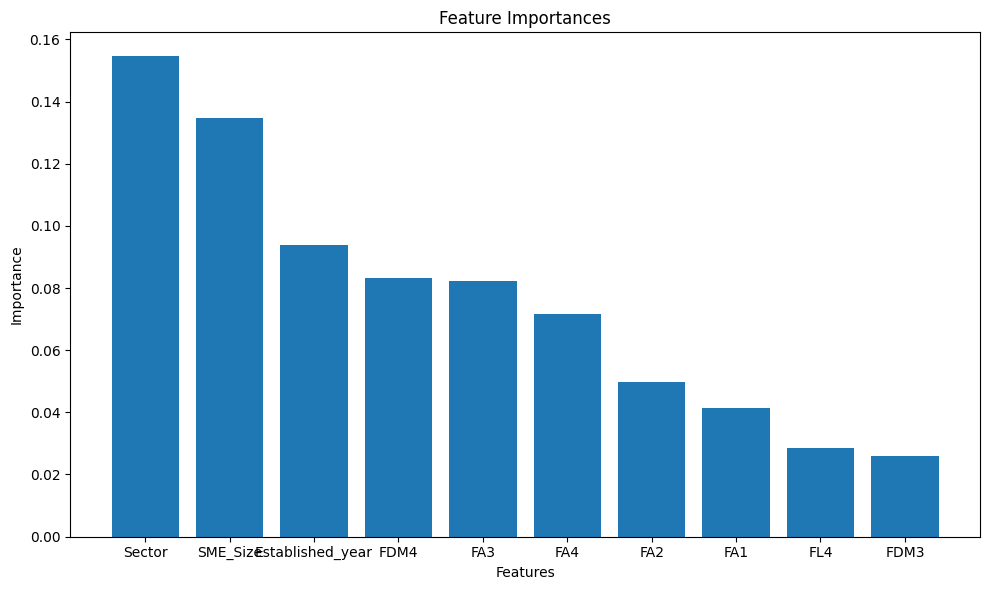

In [97]:
#Feature Importance
importance=rf.feature_importances_
feature_names=X.columns
indices=np.argsort(importance)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(10),importance[indices[:10]],align="center")
plt.xticks(range(10),feature_names[indices[:10]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

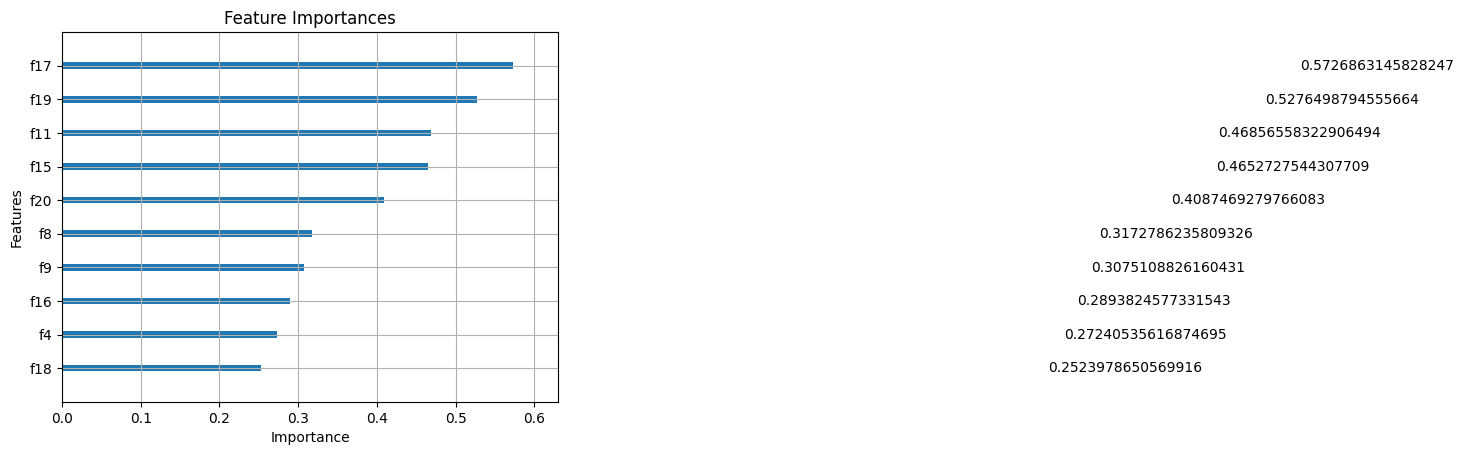

In [96]:
#XGBoost Feature importance
from xgboost import plot_importance


xgb_model=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
xgb_model.fit(X_train_scaled,y_train)

plt.figure(figsize=(10,6))
plot_importance(xgb_model,max_num_features=10,importance_type='gain')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

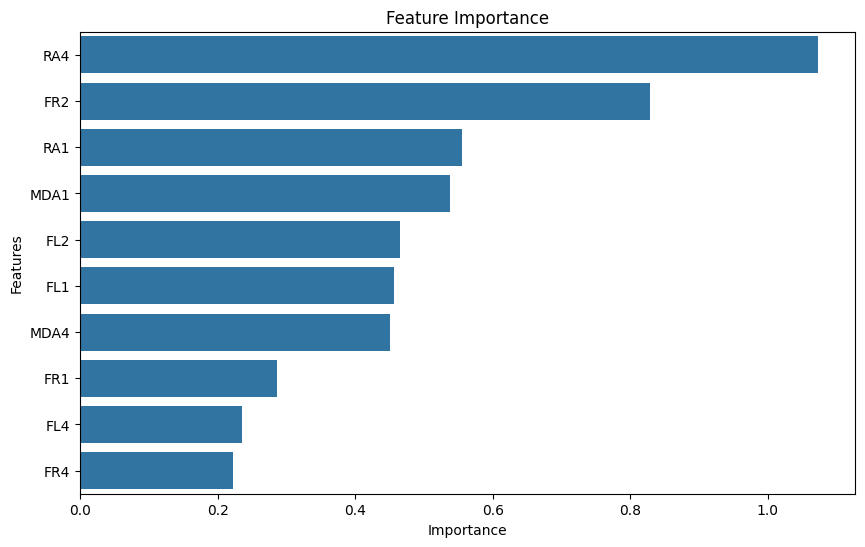

In [98]:
coeffs= pd.Series(logreg.coef_[0],index=X.columns)
top_coeffs= coeffs.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_coeffs.values,y=top_coeffs.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()